In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


I will be using stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks.

In [17]:
df = pd.read_pickle('all_banks') 

In [18]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
(BAC, Open)      2517 non-null float64
(BAC, High)      2517 non-null float64
(BAC, Low)       2517 non-null float64
(BAC, Close)     2517 non-null float64
(BAC, Volume)    2517 non-null int64
(C, Open)        2517 non-null float64
(C, High)        2517 non-null float64
(C, Low)         2517 non-null float64
(C, Close)       2517 non-null float64
(C, Volume)      2517 non-null int64
(GS, Open)       2517 non-null float64
(GS, High)       2517 non-null float64
(GS, Low)        2517 non-null float64
(GS, Close)      2517 non-null float64
(GS, Volume)     2517 non-null int64
(JPM, Open)      2517 non-null float64
(JPM, High)      2517 non-null float64
(JPM, Low)       2517 non-null float64
(JPM, Close)     2517 non-null float64
(JPM, Volume)    2517 non-null int64
(MS, Open)       2517 non-null float64
(MS, High)       2517 non-null float64
(MS, Low)        2517 non

In [123]:
df.xs(key='Close',axis=1,level='Stock Info').head(3)

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50


What is the max Close price for each bank's stock throughout the time period?

In [23]:
df.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [124]:
df.xs(key='Close',axis=1,level='Stock Info').pct_change().head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


DataFrame returns. This dataframe will contain the returns for each bank's stock.

In [25]:
return_ = df.xs(key='Close',axis=1,level='Stock Info').pct_change()

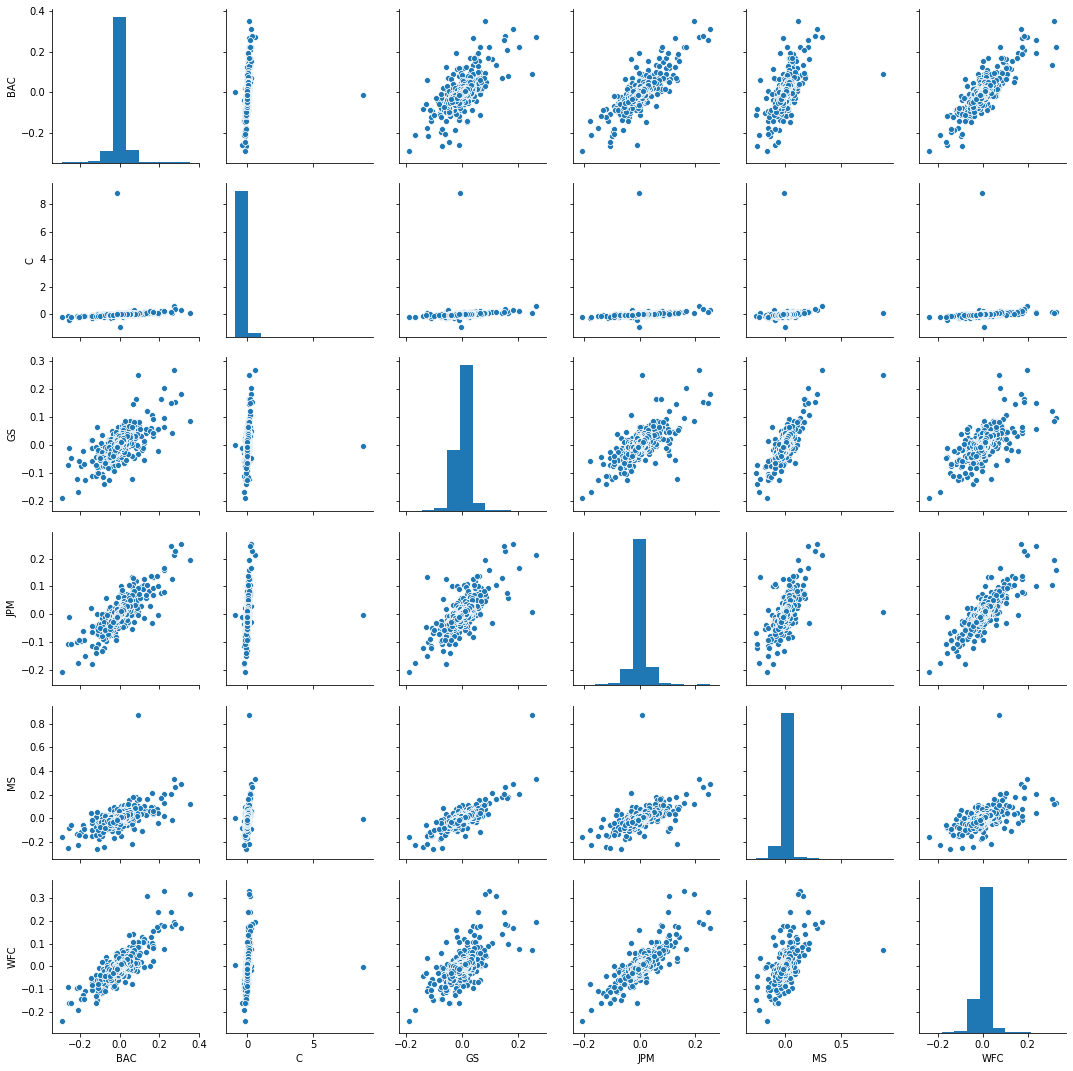

In [31]:
sns.pairplot(return_[1:])

Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. 
You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

In [28]:
return_.idxmin()

Bank Ticker
BAC   2009-01-20
C     2011-05-06
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

In [29]:
return_.idxmax()

Bank Ticker
BAC   2009-04-09
C     2011-05-09
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

Standard deviation of the returns, which stock would it classify as the riskiest over the entire time period? 
Which would it classify as the riskiest for the year 2015?

# Higher the Standard deviation higher the risk

In [32]:
return_.std()

Bank Ticker
BAC    0.036650
C      0.179969
GS     0.025346
JPM    0.027656
MS     0.037820
WFC    0.030233
dtype: float64

In [46]:
return_.loc['2015-01-01':'2015-12-31'].std()

Bank Ticker
BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

Create a distplot using seaborn of the 2015/2008 returns for Morgan Stanley

Text(0.5, 1.0, 'Morgan Stanly')

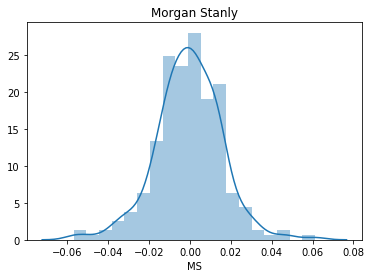

In [41]:
sns.distplot(return_.loc['2015-01-01':'2018-12-31']['MS'])
plt.title('Morgan Stanly')

Text(0.5, 1.0, 'City Group')

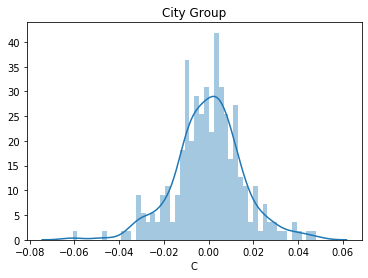

In [44]:
sns.distplot(return_.loc['2015-01-01':'2018-12-31']['C'],bins=50)
plt.title('City Group')

In [75]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [77]:
df.xs('Close',axis=1,level=1).iplot()

In [89]:
df.xs(key='Close',level=1,axis=1)

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.90,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.80,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.20,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.20,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.90,130.39,40.67,59.19,31.68
...,...,...,...,...,...,...
2015-12-24,17.27,52.71,182.47,66.60,32.48,54.82
2015-12-28,17.13,52.38,181.62,66.38,32.17,54.68
2015-12-29,17.28,52.98,183.53,67.07,32.55,55.29


# Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

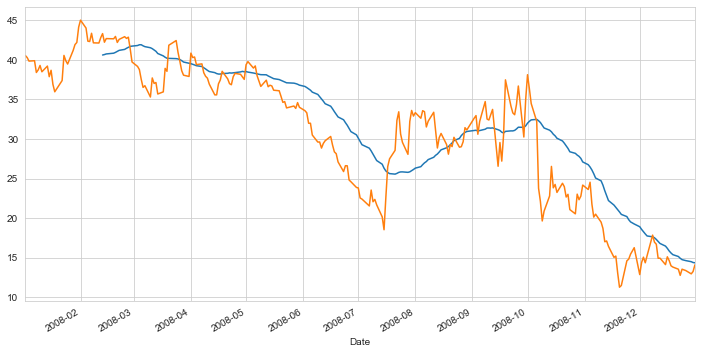

In [94]:
rolling_avg = pd.DataFrame()
rolling_avg['30 days avg'] = df.loc['2008-01-01':'2008-12-31'].xs(key='Close',level='Stock Info'
                                                                  ,axis=1)['BAC'].rolling(window=30).mean()
rolling_avg['30 days avg'].plot(figsize=(12,6),label='30 days rolling avg')
df.loc['2008-01-01':'2008-12-31'].xs(key='Close',level='Stock Info'
                                                                  ,axis=1)['BAC'].plot(figsize=(12,6),label='BofA Close')

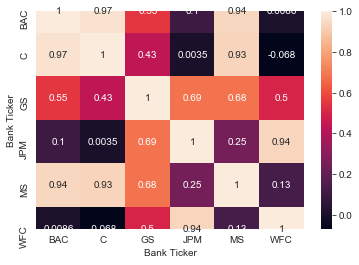

In [98]:
sns.heatmap(df.xs(key='Close',level='Stock Info',axis=1).corr(),annot=True)


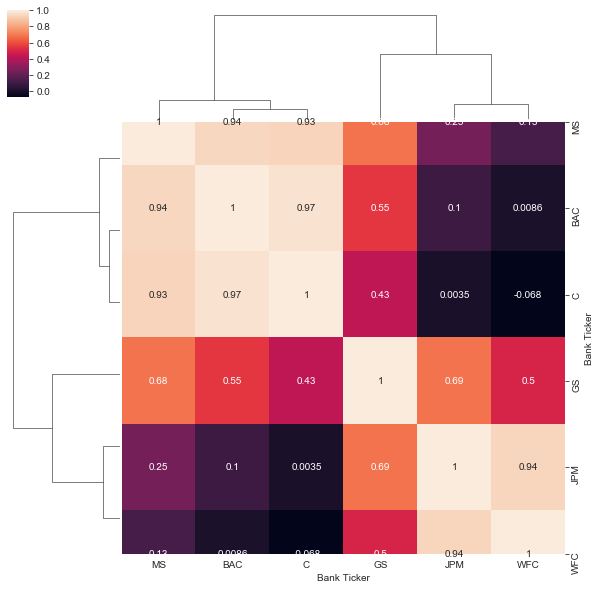

In [99]:
sns.clustermap(df.xs(key='Close',level='Stock Info',axis=1).corr(),annot=True)


In [104]:
df.xs(key='Close',level='Stock Info',axis=1).corr().iplot(kind='heatmap')

# Candle Plot

In [122]:
p = df.loc['2008-01-01':'2008-12-31']['BAC']
p.iplot(kind='candle')